In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import linear, relu, sigmoid
%matplotlib widget
import matplotlib.pyplot as plt

import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)
np.set_printoptions(precision=2)

In [3]:
X = np.load('X.npy')
y = np.load('y.npy')

In [4]:
print('First element of X:',X[0])

First element of X: [ 0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
  0.00e+00  0.00e+00  0.00e+00  0.00e+00  8.56e-06  1.94e-06 -7.37e-04
 -8.13e-03 -1.86e-02 -1.87e-02 -1.88e-02 -1.91e-02 -1.64e-02 -3.78e-03
  3.30e-04  1.28e-05  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
  0.00e+00  0.00e+00  1.16e-04  1.20e-04 -1.40e-02 -2.85e-02  8.04e-02
  2.67e-01  2.74e-01  2.79e-01  2.74e-01  2.25e-01  2.78e

In [5]:
print(f'The first element of y is {y[0][0]} and the last element of y is {y[-1][0]}')

The first element of y is 0 and the last element of y is 9


In [6]:
print('Shape of X:',str(X.shape))
print('Shape of Y:',str(y.shape))

Shape of X: (5000, 400)
Shape of Y: (5000, 1)


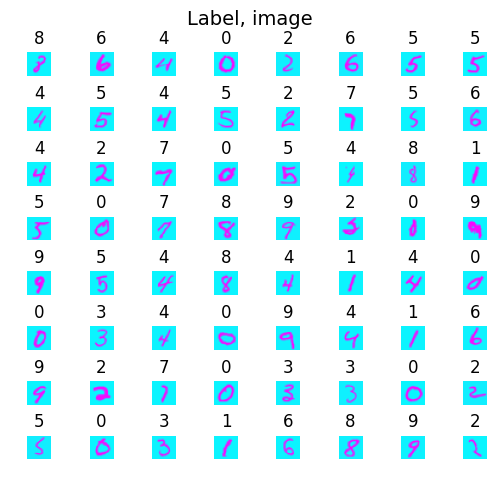

In [7]:
m, n = X.shape

fig, axes = plt.subplots(8,8, figsize=(5,5))
fig.tight_layout(pad=0.13,rect=[0, 0.03, 1, 0.91]) #[left, bottom, right, top]

for i,ax in enumerate(axes.flat):
    random_index = np.random.randint(m)
    
    X_random_reshaped = X[random_index].reshape((20,20)).T
    
    ax.imshow(X_random_reshaped, cmap='cool')
    
    ax.set_title(y[random_index,0])
    ax.set_axis_off()
    fig.suptitle("Label, image", fontsize=14)

In [24]:
tf.random.set_seed(1234) 
model = Sequential(
    [               
        tf.keras.Input(shape=(400,)), 
        Dense(25, activation='relu', name = "L1"),
        Dense(15, activation='relu', name = "L2"),
        Dense(10, activation='linear', name = 'L3')
    ], name = "my_model" 
)

In [25]:
model.summary()

Model: "my_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 L1 (Dense)                  (None, 25)                10025     
                                                                 
 L2 (Dense)                  (None, 15)                390       
                                                                 
 L3 (Dense)                  (None, 10)                160       
                                                                 
Total params: 10575 (41.31 KB)
Trainable params: 10575 (41.31 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [26]:
[layer1, layer2, layer3] = model.layers

In [27]:
W1,b1 = layer1.get_weights()
W2,b2 = layer2.get_weights()
W3,b3 = layer3.get_weights()
print(f"W1 shape = {W1.shape}, b1 shape = {b1.shape}")
print(f"W2 shape = {W2.shape}, b2 shape = {b2.shape}")
print(f"W3 shape = {W3.shape}, b3 shape = {b3.shape}")

W1 shape = (400, 25), b1 shape = (25,)
W2 shape = (25, 15), b2 shape = (15,)
W3 shape = (15, 10), b3 shape = (10,)


In [29]:
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
)

history = model.fit(
    X,y,
    epochs=100
)

Epoch 1/100
157/157 [==============================] - 0s 356us/step - loss: 0.0310
Epoch 2/100
157/157 [==============================] - 0s 354us/step - loss: 0.0290
Epoch 3/100
157/157 [==============================] - 0s 344us/step - loss: 0.0263
Epoch 4/100
157/157 [==============================] - 0s 334us/step - loss: 0.0238
Epoch 5/100
157/157 [==============================] - 0s 329us/step - loss: 0.0210
Epoch 6/100
157/157 [==============================] - 0s 327us/step - loss: 0.0190
Epoch 7/100
157/157 [==============================] - 0s 330us/step - loss: 0.0225
Epoch 8/100
157/157 [==============================] - 0s 342us/step - loss: 0.0160
Epoch 9/100
157/157 [==============================] - 0s 339us/step - loss: 0.0147
Epoch 10/100
157/157 [==============================] - 0s 348us/step - loss: 0.0137
Epoch 11/100
157/157 [==============================] - 0s 340us/step - loss: 0.0124
Epoch 12/100
157/157 [==============================] - 0s 336us/step - lo

In [66]:
two_img = X[4900]

In [67]:
prediction = model.predict(two_img.reshape(1,400))

1/1 [==============================] - 0s 16ms/step


In [7]:
print(f"Values: {prediction}")

NameError: name 'prediction' is not defined

In [69]:
print(f" Largest prediction index: {np.argmax(prediction)}")

 Largest prediction index: 9


In [61]:
prediction_sm = tf.nn.softmax(prediction)

In [62]:
print("Probability vector:",prediction_sm)
print(f"Sum of values in probability vector: {np.sum(prediction_sm):0.2f}")

Probability vector: tf.Tensor(
[[2.11e-11 6.25e-20 1.00e+00 3.69e-04 0.00e+00 1.84e-15 6.59e-18 9.32e-28
  4.20e-15 2.11e-31]], shape=(1, 10), dtype=float32)
Sum of values in probability vector: 1.00


In [63]:
yhat = np.argmax(prediction_sm)

In [64]:
print("np.argmax(prediction_sm)",yhat)

np.argmax(prediction_sm) 2


1/1 [==============================] - 0s 7ms/step


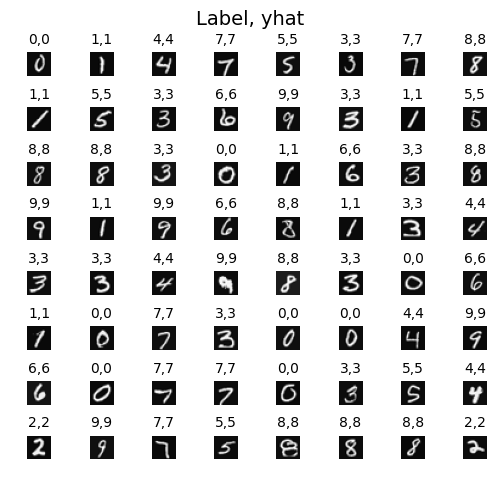

In [65]:
m, n = X.shape

fig, axes = plt.subplots(8,8, figsize=(5,5))
fig.tight_layout(pad=0.13,rect=[0, 0.03, 1, 0.91]) #[left, bottom, right, top]

for i,ax in enumerate(axes.flat):
    random_index = np.random.randint(m)
    
    X_random_reshaped = X[random_index].reshape((20,20)).T
    
    ax.imshow(X_random_reshaped, cmap='gray')
    
    prediction = model.predict(X[random_index].reshape(1,400))
    prediction_p = tf.nn.softmax(prediction)
    yhat = np.argmax(prediction_p)
    
    ax.set_title(f"{y[random_index,0]},{yhat}",fontsize=10)
    ax.set_axis_off()
fig.suptitle("Label, yhat", fontsize=14)
plt.show()

In [47]:
model.save('mnist_digits_model.h5')